# Mongolian Script OCR Demo

For more information like implementation details, visit the repo: https://github.com/tugstugi/mongolian-nlp/tree/master/image2bichig

## Clone Project and Download Pretrained Model

In [0]:
import os
from os.path import exists, join, basename, splitext, abspath

# clone the OCR project
git_repo_url = 'https://github.com/tugstugi/mongolian-nlp.git'
project_name = splitext(basename(git_repo_url))[0]
if not exists(project_name):
  # clone and install
  !git clone -q {git_repo_url}

# download pretrained model
checkpoint_file_name = 'image2bichig-checkpoint.pth'
if not exists(checkpoint_file_name):
  !wget -q -O {checkpoint_file_name} "https://drive.google.com/uc?export=download&id=1FBnyrgBLVAxWXgmPGvRFMQX__nk32iND"
  
import sys
sys.path.append(join(project_name, 'image2bichig'))
from ocr import line_segmentation, ocr

import cv2
import numpy as np
import matplotlib.pylab as plt
plt.rcParams["axes.grid"] = False

## Recognize Text

Currently only black and white background supported. Handwritten text can't be also recognized!


Download an image containing Mongolian script:

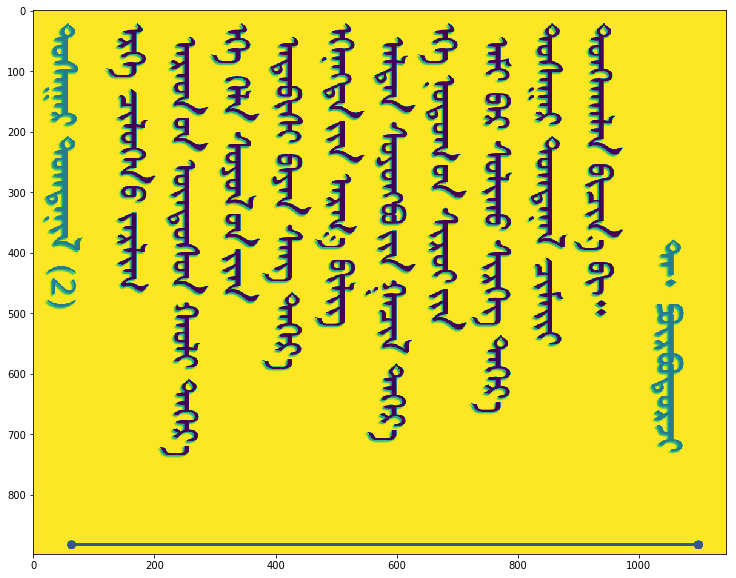

In [0]:
IMAGE_URL = 'http://1.bp.blogspot.com/-XpunKtVB7Oc/U4cBrulYEGI/AAAAAAAAaFQ/TuZ6UNIydYw/s1600/T-Purevdorj-2.PNG'
#IMAGE_URL = 'https://4.bp.blogspot.com/_o4iGKZBNNIo/RvBT0P_BnII/AAAAAAAAAeI/cdeH53CK_Kg/s400/minii_nutag.JPG'
#IMAGE_URL = 'https://66.media.tumblr.com/003b83fc30a65eb79d08bc4a733c482c/tumblr_nuc2yuRRkN1uv9p6no1_1280.jpg'

image_file_name = basename(IMAGE_URL)
!wget -q {IMAGE_URL} -O {image_file_name}

img = cv2.imread(image_file_name, 0)
plt.figure(figsize=(20, 10))
plt.imshow(img)

Before doing OCR we have to segment lines:

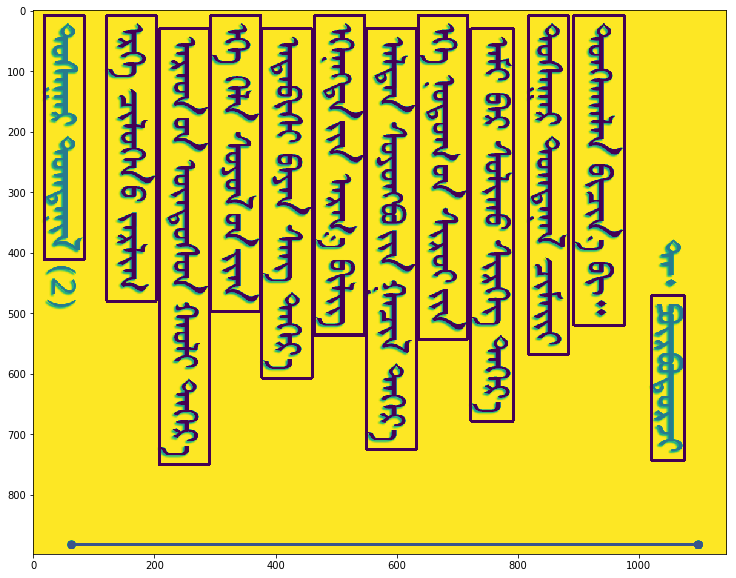

In [0]:
lines = line_segmentation(img, aspect_ratio=0.25)
img_copy = img.copy()
for line in lines:
    (x1,y1), (x2,y2) = line
    cv2.rectangle(img_copy, (x1,y1), (x2,y2), 0, 3)
plt.figure(figsize=(20, 10))
plt.imshow(img_copy)

On each segmented line, do OCR:

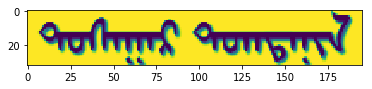

ᠳᠤᠬᠠᠭᠠᠷ ᠲᠣᠭᠲᠠᠨᠢᠯ 


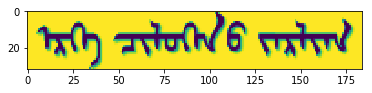

ᠡᠷᠬᠡ ᠴᠢᠯᠦᠭᠡᠨ᠎ ᠦ ᠵᠠᠷᠯᠢᠭ


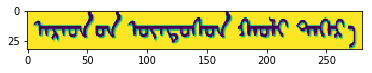

ᠠᠷᠠᠳ ᠤᠨ ᠦᠨᠳᠦᠰᠦᠨ ᠬᠠᠤᠯᠢ ᠳᠡᠭᠡᠷ᠎ᠡ


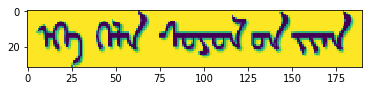

ᠡᠬᠡ ᠬᠡᠯᠡ ᠰᠤᠶᠤᠯ ᠤᠨ ᠢᠶᠠᠨ


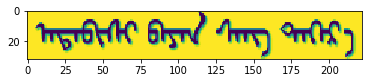

ᠠᠳᠠᠪᠢᠰᠢ ᠪᠠᠶᠠᠨ ᠰᠠᠩ ᠳᠡᠭᠡᠷ᠎ᠡ


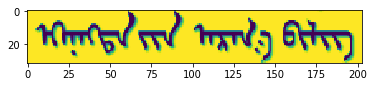

ᠡᠭᠡᠨᠡᠭᠲᠡ ᠶᠢᠨ ᠠᠷᠭ᠎ᠠ ᠪᠢᠯᠢᠭ


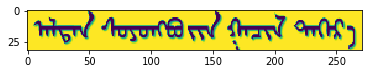

ᠠᠯᠲᠠᠨ ᠰᠣᠶᠣᠩᠪᠣ ᠶᠢᠨ ᠭᠠᠴᠢᠯ ᠳᠡᠭᠡᠷ᠎ᠡ


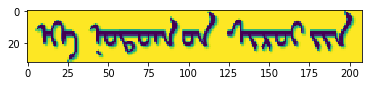

ᠡᠬᠡ ᠨᠤᠲᠤᠭ ᠤᠨ ᠰᠢᠷᠣᠢ ᠶᠢᠨ


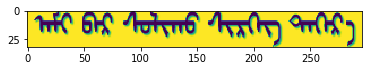

ᠠᠮᠢ ᠪᠠᠷ ᠰᠣᠯᠢᠬᠤ ᠰᠢᠷᠬᠡᠭ ᠳᠡᠭᠡᠷ᠎ᠡ


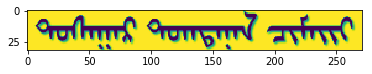

ᠳᠤᠰᠠᠭᠠᠷ ᠲᠣᠭᠲᠠᠨᠠᠯ ᠴᠢᠮᠠᠢᠢᠢ᠎


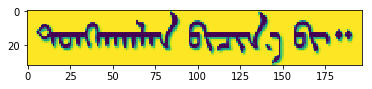

ᠲᠤᠩᠬᠠᠭᠯᠠᠨ ᠪᠢᠴᠢᠨ᠎ᠡ ᠪᠢ᠁


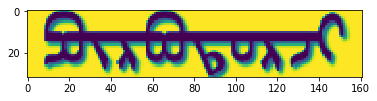

ᠫᠣᠸᠷᠪᠣᠲᠣᠷᠴᠢ


In [0]:

for line_img, line_txt in ocr(img, lines, checkpoint_file_name):
  plt.figure()
  plt.imshow(line_img)
  plt.show()
  print(line_txt)